In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [3]:
def plot_moments(data, moments, dt=0.0002, save_interval=100, cmap='viridis', vmin=None, vmax=None):
    indices = [int(x/dt/save_interval) for x in moments]

    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(141)
    ax1.imshow(data[indices[0]].T, vmin=vmin, vmax=vmax, cmap=cmap)
    ax1.set_title(str(moments[0]) + 's')
    ax2 = fig.add_subplot(142)
    ax2.imshow(data[indices[1]].T, vmin=vmin, vmax=vmax, cmap=cmap)
    ax2.set_title(str(moments[1]) + 's')
    ax3 = fig.add_subplot(143)
    ax3.imshow(data[indices[2]].T, vmin=vmin, vmax=vmax, cmap=cmap)
    ax3.set_title(str(moments[2]) + 's')
    ax4 = fig.add_subplot(144)
    ax4.imshow(data[indices[3]].T, vmin=vmin, vmax=vmax, cmap=cmap)
    ax4.set_title(str(moments[3]) + 's')

    plt.show()

## Fast wave tests

In [4]:
numx = 100
numy = 100
T = 2
dt = 0.0002
save_interval=100

In [5]:
# Construct a square muscle sheet as testbed

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=1, 
              gip3y=1, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

### Stimulating 1x1 cell

In [6]:
# Set fast stimulation pattern
layer.reset_stim_pattern()
layer.set_stim_pattern(pathway='fast',
                       xmin=50, xmax=51, ymin=30, ymax=31,
                       stim_times=[0])
layer.set_stim_pattern(pathway='fast',
                       xmin=50, xmax=51, ymin=70, ymax=71,
                       stim_times=[0])

In [7]:
# Run simulation
sol = layer.run()

100%|██████████| 10000/10000 [00:12<00:00, 779.43it/s]


In [8]:
# Analyze results
c = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
v = sol[:, 4*numx*numy : 5*numx*numy].reshape(-1, numx, numy)

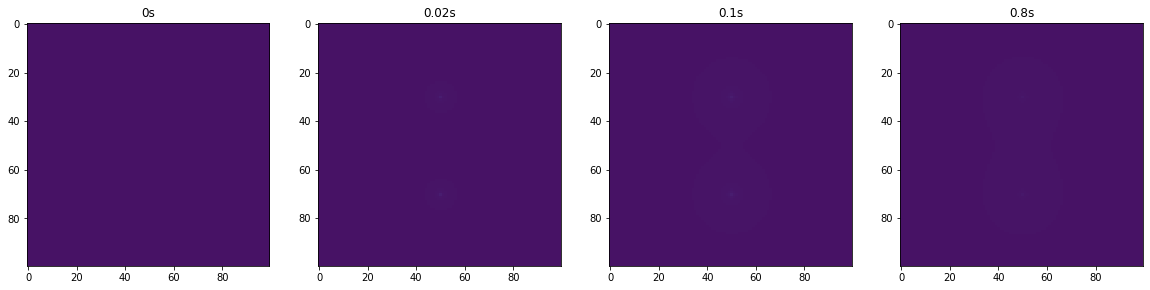

In [9]:
# Plot the calcium concentration
plot_moments(c, [0, 0.02, 0.1, 0.8], vmin=0, vmax=1)

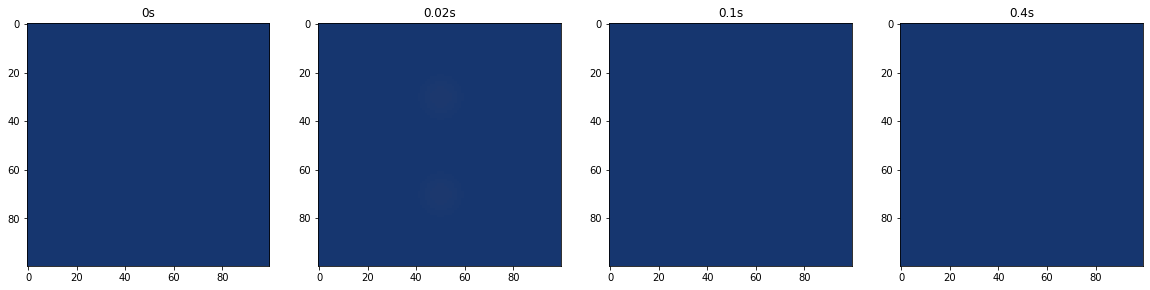

In [10]:
# Plot the action potential
plot_moments(v, [0, 0.02, 0.1, 0.4], cmap='cividis', vmin=-60, vmax=25)

### Stimulating 2x2 cells

In [11]:
# Set fast stimulation pattern
layer.reset_stim_pattern()
layer.set_stim_pattern(pathway='fast',
                       xmin=50, xmax=52, ymin=30, ymax=32,
                       stim_times=[0])
layer.set_stim_pattern(pathway='fast',
                       xmin=50, xmax=52, ymin=70, ymax=72,
                       stim_times=[0])

In [12]:
# Run simulation
sol = layer.run()

100%|██████████| 10000/10000 [00:12<00:00, 792.51it/s]


In [13]:
# Analyze results
c = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
v = sol[:, 4*numx*numy : 5*numx*numy].reshape(-1, numx, numy)

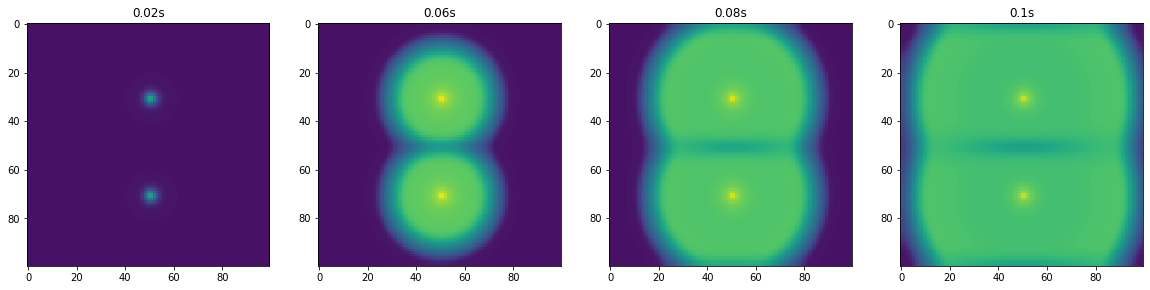

In [14]:
# Plot the calcium concentration
plot_moments(c, [0.02, 0.06, 0.08, 0.1], vmin=0, vmax=1)

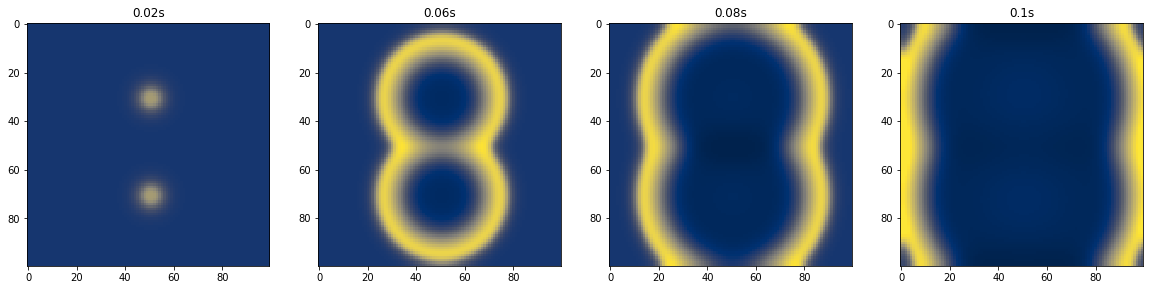

In [15]:
# Plot the action potential
plot_moments(v, [0.02, 0.06, 0.08, 0.1], cmap='cividis', vmin=-60, vmax=25)

## Slow wave tests 

In [4]:
numx = 100
numy = 100
T = 50
dt = 0.0002
save_interval=100

In [5]:
# Construct a square muscle sheet as testbed

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.01)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=1, 
              gip3y=1, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval,
              active_v_beta=5)

### Stimulating 1x1 cell

In [6]:
# Set slow stimulation pattern
layer.reset_stim_pattern()
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=51, ymin=40, ymax=41,
                       stim_times=[0])
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=51, ymin=60, ymax=61,
                       stim_times=[0])

In [7]:
# Run simulation
sol = layer.run()

100%|██████████| 250000/250000 [05:03<00:00, 824.15it/s]


In [8]:
# Analyze results
c = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
ip = sol[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)

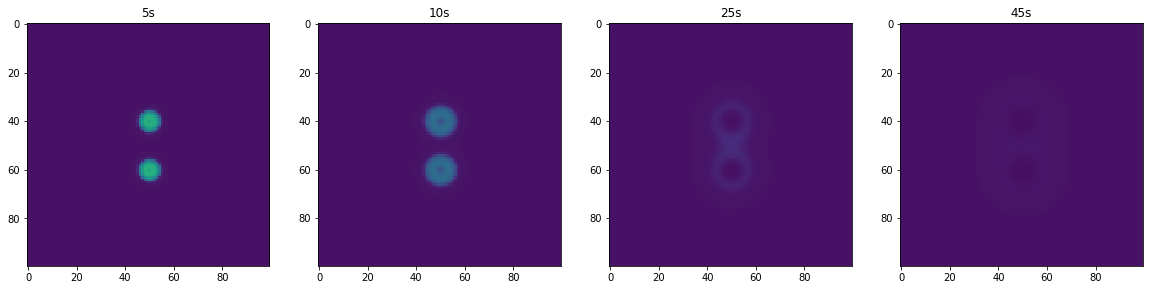

In [9]:
# Plot the calcium concentration
plot_moments(c, [5, 10, 25, 45], vmin=0, vmax=1)

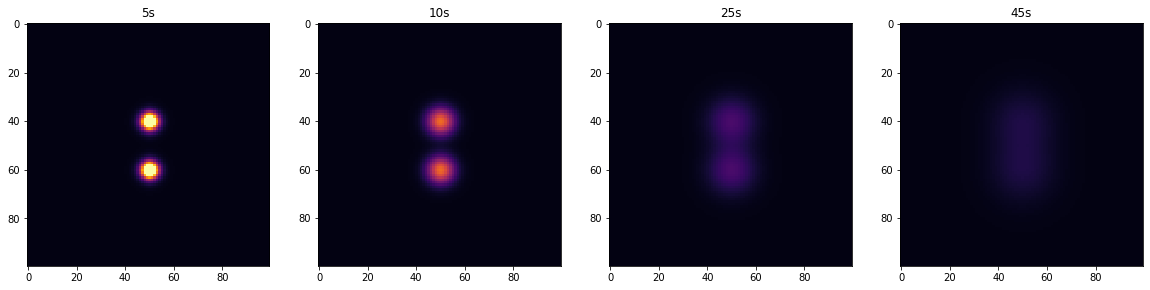

In [10]:
# Plot the IP3 concentration
plot_moments(ip, [5, 10, 25, 45], cmap='inferno', vmin=0, vmax=0.3)

### Stimulating 2x2 cells

In [11]:
# Set slow stimulation pattern
layer.reset_stim_pattern()
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=52, ymin=40, ymax=42,
                       stim_times=[0])
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=52, ymin=60, ymax=62,
                       stim_times=[0])

In [12]:
# Run simulation
sol = layer.run()

100%|██████████| 250000/250000 [05:09<00:00, 808.10it/s]


In [13]:
# Analyze results
c = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
ip = sol[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)

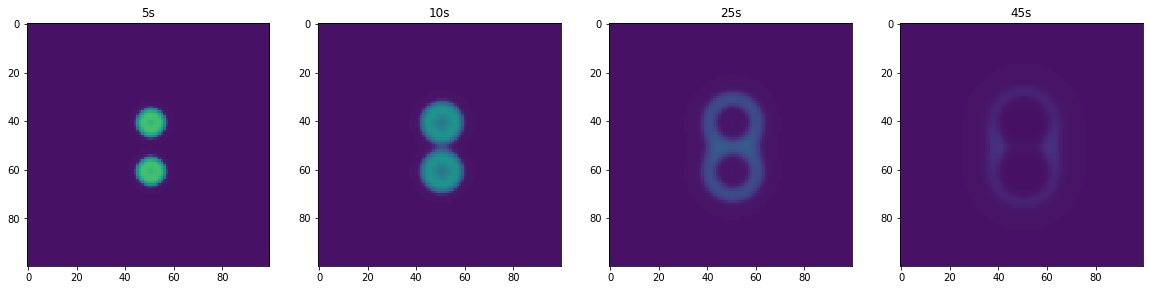

In [14]:
# Plot the calcium concentration
plot_moments(c, [5, 10, 25, 45], vmin=0, vmax=1)

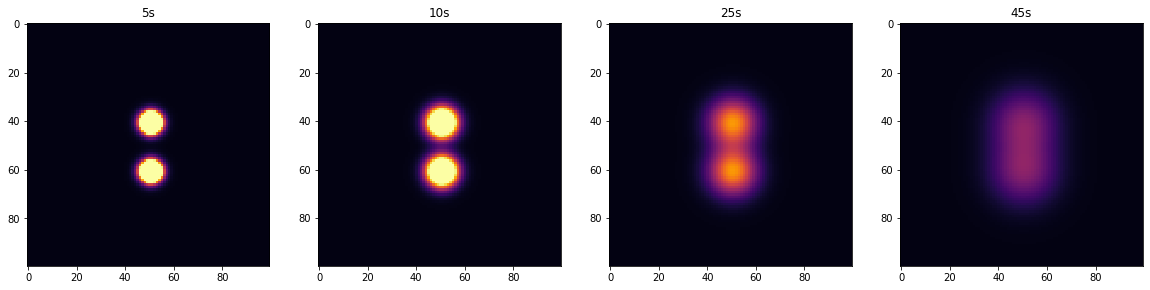

In [15]:
# Plot the IP3 concentration
plot_moments(ip, [5, 10, 25, 45], cmap='inferno', vmin=0, vmax=0.3)

### Stimulating 4x4 cells

In [16]:
# Set slow stimulation pattern
layer.reset_stim_pattern()
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=54, ymin=40, ymax=44,
                       stim_times=[0])
layer.set_stim_pattern(pathway='slow',
                       xmin=50, xmax=54, ymin=60, ymax=64,
                       stim_times=[0])

In [17]:
# Run simulation
sol = layer.run()

100%|██████████| 250000/250000 [05:12<00:00, 799.86it/s]


In [18]:
# Analyze results
c = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
ip = sol[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)

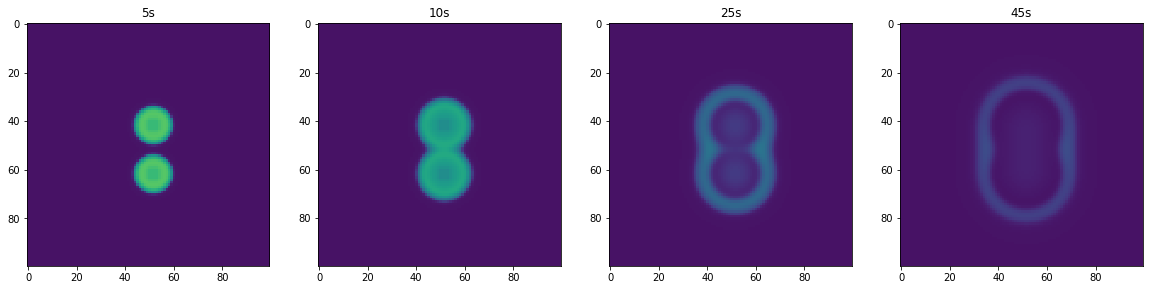

In [19]:
# Plot the calcium concentration
plot_moments(c, [5, 10, 25, 45], vmin=0, vmax=1)

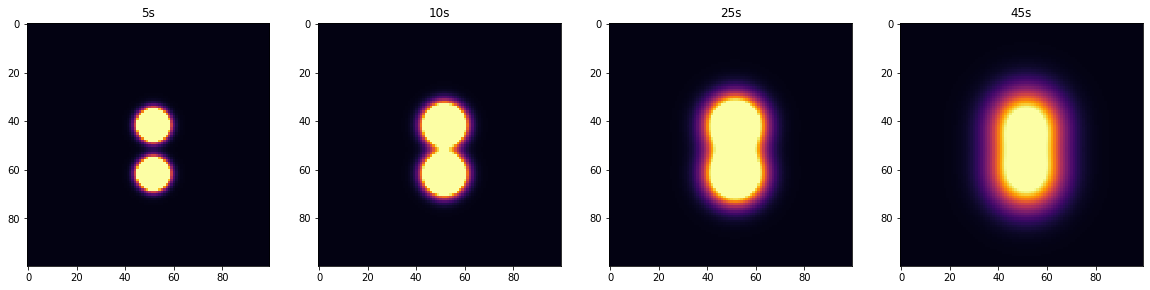

In [22]:
# Plot the IP3 concentration
plot_moments(ip, [5, 10, 25, 45], cmap='inferno', vmin=0, vmax=0.3)